In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

##Loading the data set

In [ ]:
column_names = ["target", "ids", "date", "flag", "user", "text"]
data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin1', names=column_names)


## Initial Data Analysis.

In [ ]:
# Display the first few rows of the dataset to get a sense of its structure and contents
print("Displaying the first few rows of the dataset:")
print(data.head())

# Print the column names to confirm the data's structure and identify the available features
print("\nColumn names in the dataset:")
print(data.columns)

# Check the data types of each column to understand what kind of data we're working with
# This helps identify numerical, categorical, or text data types in each column
print("\nData types of each column:")
print(data.dtypes)

# Check for missing values in each column
# This shows the total number of null values in each column, helping identify columns that need cleaning
print("\nChecking for missing values in each column:")
print(data.isnull().sum())

# Display basic statistics for numerical columns to understand their distribution
# Provides summary statistics like mean, standard deviation, min, and max values for numeric columns
print("\nSummary statistics for numerical columns:")
print(data.describe())

# Check the distribution of the target variable to identify potential class imbalance issues
# Replace 'target' with the name of your target column if different
if 'target' in data.columns:
    print("\nDistribution of target classes:")
    print(data['target'].value_counts())
else:
    print("\nNo target column found, please ensure the target variable is identified correctly.")



Displaying the first few rows of the dataset:
   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  

Column names in the dataset:
Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

Data types of each column:


##Data Cleaning

In [ ]:
# Select only the 'target' and 'text' columns from the dataset for analysis
# This is done to reduce the dataset to relevant columns (e.g., target sentiment and tweet text)
data = data[['target', 'text']]

# Drop rows where the 'text' column has missing (NaN) values
# This step ensures that all rows have valid tweet text for analysis
# 'inplace=True' modifies the DataFrame directly without needing to reassign it
data.dropna(subset=['text'], inplace=True)


In [ ]:
print(data.head())
print(data.columns)

   target                                               text
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...
3       0    my whole body feels itchy and like its on fire 
4       0  @nationwideclass no, it's not behaving at all....
Index(['target', 'text'], dtype='object')


In [ ]:
# Keep only the 'target' and 'text' columns for simplicity in further analysis
data = data[['target', 'text']]

# Drop rows where the 'text' column has missing (NaN) values
# This step ensures that all rows have valid tweet text for analysis
# 'inplace=True' modifies the DataFrame directly without needing to reassign it
data.dropna(subset=['text'], inplace=True)

# Define a function to clean text data by removing unnecessary characters and stopwords
def clean_text(text):
    # Convert the text to lowercase to ensure consistency in analysis
    text = text.lower()

    # Remove any non-alphabetic characters except spaces
    # This keeps only letters and spaces, removing punctuation, numbers, and special characters
    ct = ''.join([char for char in text if char.isalpha() or char.isspace()])

    # Split text into individual words for further filtering
    words = ct.split()

    # Define a basic list of stopwords to remove common words that don't add meaning
    stopwords = ['the', 'is', 'in', 'and', 'to', 'of', 'a', 'that', 'it', 'on', 'for', 'with', 'as', 'was', 'at', 'by', 'an', 'be']

    # Filter out stopwords from the list of words
    words = [word for word in words if word not in stopwords]

    # Rejoin the cleaned words back into a single string
    return ' '.join(words)

# Apply the clean_text function to each row in the 'text' column
# The cleaned text is stored in a new column 'ct' for further analysis
data['ct'] = data['text'].apply(clean_text)


In [ ]:
# lemmatizer = WordNetLemmatizer()

# def tokenize_and_lemmatize(text):
#     tokens = text.split()

#     lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

#     return ' '.join(lemmatized_tokens)

# data['pt'] = data['ct'].apply(tokenize_and_lemmatize)


In [ ]:
# Convert relevant object columns to category type
# Check if 'target' and other object columns would benefit from this conversion
data['target'] = data['target'].astype('category')

# Convert other object columns to 'category' if they are retained in the dataset
# Uncomment if these columns are kept for analysis
# data['user'] = data['user'].astype('category')
# data['flag'] = data['flag'].astype('category')

# Verify the data types after conversion
print(data.dtypes)


target    category
text        object
ct          object
dtype: object


In [ ]:
print(data)

        target                                               text  \
0            0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1            0  is upset that he can't update his Facebook by ...   
2            0  @Kenichan I dived many times for the ball. Man...   
3            0    my whole body feels itchy and like its on fire    
4            0  @nationwideclass no, it's not behaving at all....   
...        ...                                                ...   
1599995      4  Just woke up. Having no school is the best fee...   
1599996      4  TheWDB.com - Very cool to hear old Walt interv...   
1599997      4  Are you ready for your MoJo Makeover? Ask me f...   
1599998      4  Happy 38th Birthday to my boo of alll time!!! ...   
1599999      4  happy #charitytuesday @theNSPCC @SparksCharity...   

                                                        ct  
0        switchfoot httptwitpiccomyzl awww thats bummer...  
1        upset he cant update his facebook textin

##Data Visualization

#1. Class Distribution - Bar Plot
This shows the distribution of each sentiment class, helping identify any class imbalance.

<ipython-input-12-f5553a3ae47a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='viridis')


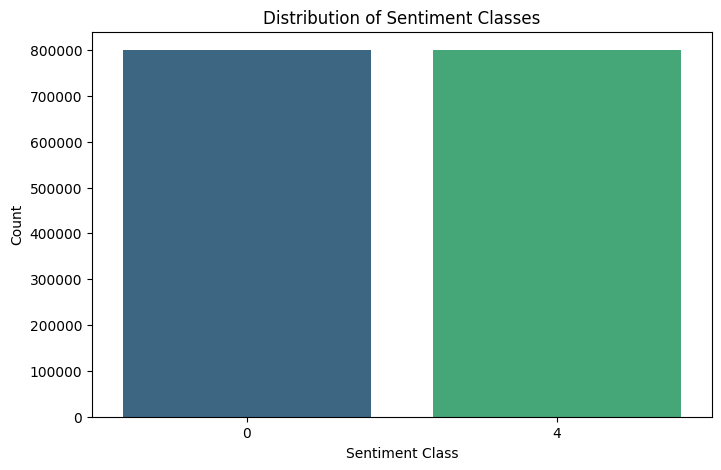

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=data, palette='viridis')
plt.title("Distribution of Sentiment Classes")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.show()


#2. Word Count Distribution - Histogram
Display the distribution of word counts in each tweet to see if most tweets are short, long, or have varied lengths.

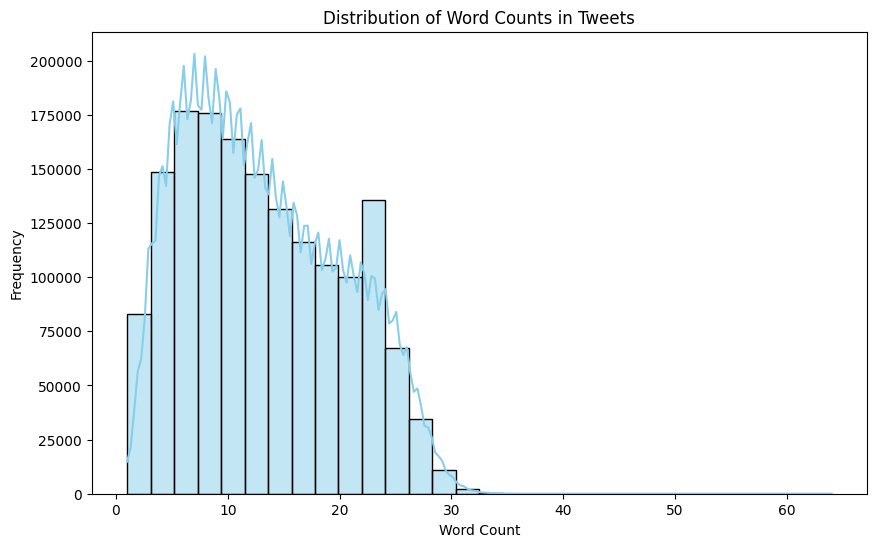

In [ ]:
# Add a new column with word count for each tweet in the 'text' column
data['word_count'] = data['text'].apply(lambda x: len(x.split()))

# Plot word count distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['word_count'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Word Counts in Tweets")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


#3. Term Frequency Distribution
Bar Plot of Most Common Words

<ipython-input-14-6a797a4ae268>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='magma')


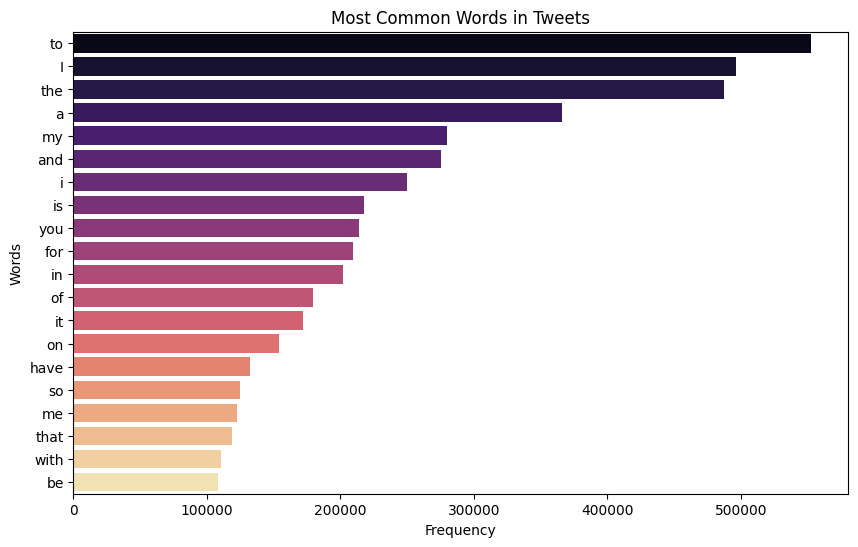

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Get all words in a single list from the 'text' column
all_words = ' '.join(data['text']).split()
word_counts = Counter(all_words)

# Most common 20 words
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

# Plot most common words
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='magma')
plt.title("Most Common Words in Tweets")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


#4. Correlation Heatmap (if Numeric Features are Available)
Although text data is non-numeric, if you create numeric features (like word count, character count), you can examine correlations between them and sentiment.

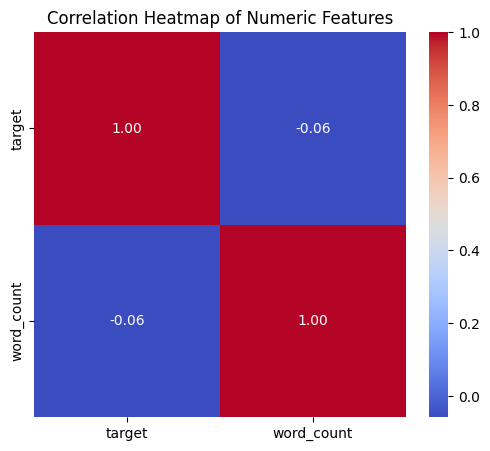

In [ ]:
# Calculate correlations (if you have numeric features like word_count, character_count, etc.)
numeric_data = data[['target', 'word_count']]  # Add any other numeric features you might create

plt.figure(figsize=(6, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


#5. Pair Plot (if Multiple Numeric Features are Available)
If you have multiple numeric features, a pair plot can help visualize pairwise relationships, but it’s more relevant if you have additional numeric columns.

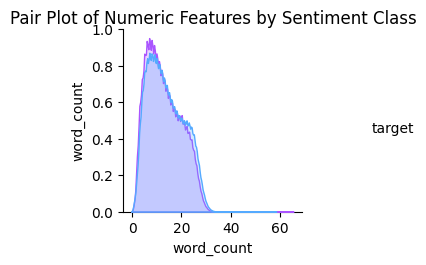

In [ ]:
# Pair plot (only if additional numeric features exist, such as character count)
sns.pairplot(numeric_data, hue='target', palette='cool', diag_kind='kde')
plt.suptitle("Pair Plot of Numeric Features by Sentiment Class", y=1.02)
plt.show()


##Feature Engineering

In [ ]:
# Feature Engineering: Add new text-based features to enhance the dataset

# Word count: Count the number of words in each tweet
data['word_count'] = data['text'].apply(lambda x: len(x.split()))

# Character count: Count the number of characters in each tweet
data['char_count'] = data['text'].apply(lambda x: len(x))

# Punctuation count: Count the number of punctuation marks in each tweet
data['punctuation_count'] = data['text'].apply(lambda x: sum([1 for char in x if char in '.,!?;:']))

# Display the dataset with new features
print(data[['text', 'word_count', 'char_count', 'punctuation_count']].head())


                                                text  word_count  char_count  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          19         115   
1  is upset that he can't update his Facebook by ...          21         111   
2  @Kenichan I dived many times for the ball. Man...          18          89   
3    my whole body feels itchy and like its on fire           10          47   
4  @nationwideclass no, it's not behaving at all....          21         111   

   punctuation_count  
0                  6  
1                  5  
2                  1  
3                  0  
4                  5  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split

# Assuming 'text' and 'target' are your main columns
X = data['text']
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=5, ngram_range=(1, 2), stop_words='english')

# Transform the training and test text data to TF-IDF feature matrices
X_train_tfidf_nb = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf_nb = tfidf_vectorizer.transform(X_test)


# Extract additional features for train and test sets
additional_features_train = data[['word_count', 'char_count', 'punctuation_count']].loc[X_train.index]
additional_features_test = data[['word_count', 'char_count', 'punctuation_count']].loc[X_test.index]

# Combine TF-IDF matrix with additional features for both training and test sets
X_train_combined = hstack([X_train_tfidf_nb, additional_features_train])
X_test_combined = hstack([X_test_tfidf_nb, additional_features_test])


##Training

In [ ]:
from sklearn.model_selection import train_test_split

# Ensure 'pt' exists or replace it with 'text' if 'pt' is not defined
# Assuming 'text' is the column containing the tweet text
if 'pt' not in data.columns:
    # If 'pt' was meant to be a processed version, you could create it here
    # For example, make a simple copy of 'text' as 'pt' if no processing has been done yet
    data['pt'] = data['text']  # This line creates 'pt' based on 'text' if 'pt' doesn't exist

# Set 'X' as the feature data and 'y' as the target variable
X = data['pt']  # Feature: processed and lemmatized text data
y = data['target']  # Target: sentiment labels (0 or 4 in this case)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_nb = TfidfVectorizer(max_df=0.95, min_df=5, ngram_range=(1, 2), stop_words='english')

X_train_tfidf_nb = tfidf_vectorizer_nb.fit_transform(X_train)

X_test_tfidf_nb = tfidf_vectorizer_nb.transform(X_test)

##Feature Engineering and transitions smoothly into Step 6: Training by preparing X_train_tfidf_nb and X_test_tfidf_nb matrices, which are ready for model training.

In [ ]:
import numpy as np
from collections import Counter
from math import log
from scipy.sparse import csr_matrix

stop_words = set(['the', 'is', 'in', 'and', 'to', 'of', 'a', 'that', 'it', 'on', 'for', 'with', 'as', 'was', 'at', 'by', 'an', 'be'])

def make_ngrams(txt, ng_range=(1, 1)):
    wrds = txt.split()
    ng_list = []
    for n in range(ng_range[0], ng_range[1] + 1):
        ng_list.extend([' '.join(wrds[i:i + n]) for i in range(len(wrds) - n + 1)])
    return ng_list

def get_tf(doc, ng_range=(1, 2)):
    terms = make_ngrams(doc, ng_range=ng_range)
    filt_terms = [term for term in terms if term not in stop_words]
    term_count = Counter(filt_terms)
    total_terms = sum(term_count.values())
    tf_vals = {term: count / total_terms for term, count in term_count.items()}
    return tf_vals

def get_idf(all_docs, min_df=5, max_df=0.95, ng_range=(1, 2)):
    total_docs = len(all_docs)
    doc_count = Counter()

    for doc in all_docs:
        unique_terms = set(make_ngrams(doc, ng_range=ng_range))
        for term in unique_terms:
            if term not in stop_words:
                doc_count[term] += 1

    min_count = min_df
    max_count = max_df * total_docs
    filt_terms = {term: count for term, count in doc_count.items() if min_count <= count <= max_count}

    idf_vals = {term: log((total_docs + 1) / (count + 1)) for term, count in filt_terms.items()}
    return idf_vals

def calc_tfidf(docs, idf_vals, ng_range=(1, 2)):
    tfidf_all = []
    for doc in docs:
        tf_vals = get_tf(doc, ng_range=ng_range)
        tfidf_vals = {term: tf_val * idf_vals.get(term, 0) for term, tf_val in tf_vals.items()}

        norm = np.sqrt(sum(val ** 2 for val in tfidf_vals.values()))
        if norm > 0:
            tfidf_vals = {term: val / norm for term, val in tfidf_vals.items()}

        tfidf_all.append(tfidf_vals)
    return tfidf_all

X_train_list = X_train.tolist()
X_test_list = X_test.tolist()

idf_vals_train = get_idf(X_train_list, min_df=5, max_df=0.95, ng_range=(1, 2))

tfidf_train = calc_tfidf(X_train_list, idf_vals_train, ng_range=(1, 2))
tfidf_test = calc_tfidf(X_test_list, idf_vals_train, ng_range=(1, 2))


feat_names = list(idf_vals_train.keys())
feat_index = {term: i for i, term in enumerate(feat_names)}

def to_sparse_mat(tfidf_docs, feat_index):
    rows, cols, vals = [], [], []

    for row, tfidf in enumerate(tfidf_docs):
        for term, val in tfidf.items():
            if term in feat_index:
                rows.append(row)
                cols.append(feat_index[term])
                vals.append(val)

    return csr_matrix((vals, (rows, cols)), shape=(len(tfidf_docs), len(feat_index)))

X_train_tfidf_nb = to_sparse_mat(tfidf_train, feat_index)
X_test_tfidf_nb = to_sparse_mat(tfidf_test, feat_index)


## MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb_model_unique = MultinomialNB()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Multinomial Naive Bayes model
# This model is well-suited for text classification, as it works with TF-IDF features
nb_model_unique = MultinomialNB()


In [ ]:
# Use the trained Naive Bayes model to predict sentiment labels for the test set
y_pred_nb = nb_model_unique.predict(X_test_tfidf_nb)


NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, pos_label=4)
recall = recall_score(y_test, y_pred_nb, pos_label=4)
f1 = f1_score(y_test, y_pred_nb, pos_label=4)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


NameError: name 'y_pred_nb' is not defined

## Custom Classifier Naive Bayes

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix
from collections import defaultdict
from math import log
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to calculate class priors
# Priors represent the probability of each class occurring in the training set
def get_class_priors(y_trn):
    cls_counts = {}
    total_docs = len(y_trn)
    for cls in y_trn:
        if cls not in cls_counts:
            cls_counts[cls] = 0
        cls_counts[cls] += 1
    priors = {cls: count / total_docs for cls, count in cls_counts.items()}
    return priors

# Function to calculate word likelihoods for each class
# This function computes conditional probabilities of words given a class, using Laplace smoothing
def get_word_likes(X_trn, y_trn, feat_idx, smooth=1):
    # Initialize word counts for each class
    cls_word_counts = {cls: [0] * len(feat_idx) for cls in set(y_trn)}

    # Sum the occurrences of each word for each class
    for cls in set(y_trn):
        cls_idxs = [i for i, label in enumerate(y_trn) if label == cls]
        cls_word_counts[cls] = X_trn[cls_idxs].sum(axis=0).A1  # Convert sparse row to an array

    # Calculate smoothed word likelihoods
    word_likes = {}
    for cls, word_counts in cls_word_counts.items():
        tot_words = sum(word_counts)
        word_likes[cls] = [(count + smooth) / (tot_words + smooth * len(feat_idx)) for count in word_counts]
    return word_likes

# Prediction function for Naive Bayes
# Computes log probabilities of each class and chooses the class with the highest probability for each instance
def pred_nb(X_tst, cls_priors, word_likes):
    preds = []
    log_cls_priors = {cls: log(prior) for cls, prior in cls_priors.items()}
    log_word_likes = {cls: [log(prob) for prob in word_likes[cls]] for cls in word_likes}

    # Iterate through each test instance
    for row in X_tst:
        log_probs = {}
        row_idx = row.indices  # Get non-zero indices in the sparse row
        row_vals = row.data    # Get corresponding values in the sparse row

        for cls in cls_priors:
            log_prob = log_cls_priors[cls]
            for i in range(len(row_idx)):
                log_prob += row_vals[i] * log_word_likes[cls][row_idx[i]]
            log_probs[cls] = log_prob
        preds.append(max(log_probs, key=log_probs.get))  # Select class with highest log-probability
    return preds

# Prepare the training labels as a list
y_trn_lst = list(y_train)

# Calculate class priors and word likelihoods for training data
cls_priors = get_class_priors(y_trn_lst)
word_likes = get_word_likes(X_train_tfidf_nb, y_trn_lst, feat_index, smooth=1)

# Use the custom Naive Bayes model to make predictions on the test set
y_pred_custom_nb = pred_nb(X_test_tfidf_nb, cls_priors, word_likes)

# Calculate evaluation metrics for the custom Naive Bayes model
acc_nb = accuracy_score(y_test, y_pred_custom_nb)
prec_nb = precision_score(y_test, y_pred_custom_nb, average='weighted')
rec_nb = recall_score(y_test, y_pred_custom_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_custom_nb, average='weighted')

# Output the performance of the custom Naive Bayes model
print(f"Custom Naive Bayes Accuracy: {acc_nb}")
print(f"Custom Naive Bayes Precision: {prec_nb}")
print(f"Custom Naive Bayes Recall: {rec_nb}")
print(f"Custom Naive Bayes F1 Score: {f1_nb}")


##Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# C=1.0 is the regularization parameter; higher values mean less regularization
# penalty='l2' applies L2 regularization, which helps prevent overfitting
# solver='saga' is used for large datasets and supports L2 regularization
# max_iter=100 sets the maximum number of iterations to 100, ensuring convergence
log_reg_model = LogisticRegression(C=1.0, penalty='l2', solver='saga', max_iter=100)


In [ ]:
# Train the Logistic Regression model on the training data
log_reg_model.fit(X_train_tfidf_nb, y_train)


In [ ]:
# Use the trained Logistic Regression model to predict sentiment labels for the test set
y_pred = log_reg_model.predict(X_test_tfidf_nb)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


NameError: name 'y_pred' is not defined

##compares the performance metrics of the Naive Bayes and Logistic Regression models
> Add blockquote



In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Calculate metrics for Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred, average='weighted')
recall_lr = recall_score(y_test, y_pred, average='weighted')
f1_lr = f1_score(y_test, y_pred, average='weighted')

# Create a DataFrame to compare both models
comparison_df = pd.DataFrame({
    "Model": ["Naive Bayes", "Logistic Regression"],
    "Accuracy": [accuracy_nb, accuracy_lr],
    "Precision": [precision_nb, precision_lr],
    "Recall": [recall_nb, recall_lr],
    "F1 Score": [f1_nb, f1_lr]
})

# Display the comparison DataFrame
print(comparison_df)


##Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l2'],
    'solver': ['saga']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=100), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_tfidf_nb, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


## Ensemble Methods

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('nb', nb_model_unique),
    ('lr', log_reg_model)
], voting='soft')

ensemble_model.fit(X_train_tfidf_nb, y_train)
y_pred_ensemble = ensemble_model.predict(X_test_tfidf_nb)
# Evaluate the ensemble model


In [ ]:
! pip freeze > requirements.txt
